In [1]:
#imports
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
#visualisation
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
#ML
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [5]:
hot_encoder = OneHotEncoder()
label_encoder= LabelEncoder()

In [6]:
train_data_address= 'Datasets/Titanic/train.csv'
test_data_address = 'Datasets/Titanic/test.csv'

In [7]:
titanic_data_train= pd.read_csv(train_data_address)
titanic_data_train.info()
titanic_data_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
titanic_data_test = pd.read_csv(test_data_address)
titanic_data_test.info()
titanic_data_test.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
titanic_data_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
features=['Age','Sex','Fare']

In [11]:
X=titanic_data_train[features]
X.head()

,Age,Sex,Fare
0,22.0,male,7.2500
1,38.0,female,71.2833
2,26.0,female,7.9250
3,35.0,female,53.1000
4,35.0,male,8.0500


In [12]:
titanic_data_train.describe(include=['O'])  # 'O' to describe Objects (strings)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Kink-Heilmann, Miss. Luise Gretchen",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


In [13]:
titanic_data_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(['Survived'], ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


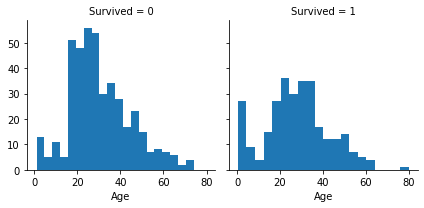

In [14]:
g = sns.FacetGrid(titanic_data_train,col='Survived')

g.map(plt.hist, 'Age', bins=20)

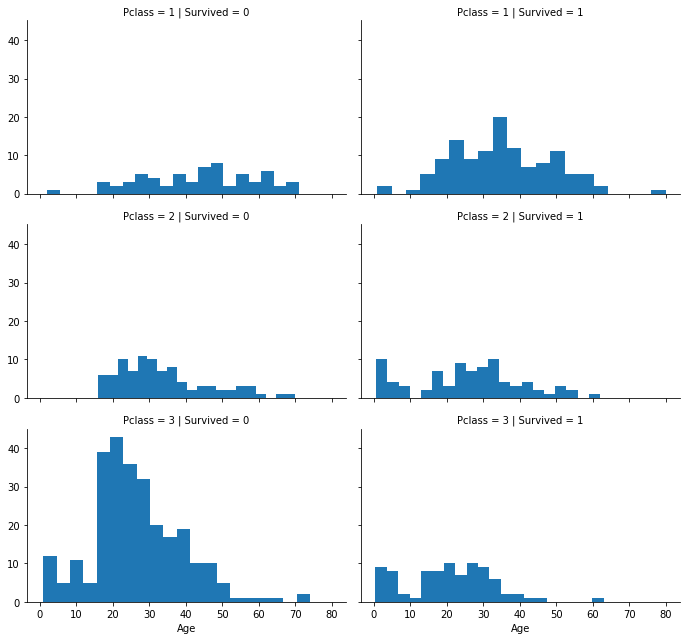

In [15]:
g1 = sns.FacetGrid(titanic_data_train, col='Survived', row='Pclass', aspect=1.6)
g1.map(plt.hist, 'Age', alpha=1, bins=20)  #Alpha - Determines the darkness of the graph. Bins - Segments
g1.add_legend()

In [16]:
combine = [titanic_data_train, titanic_data_test]

In [17]:
#Extracting Titles

for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.')
dataset['Title'].head()
pd.crosstab(titanic_data_train['Title'],titanic_data_train['Sex'])


Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [18]:

#Replacing various uncommon titles with 'Rare'

for data in combine:
    data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'],'Rare')
    data['Title'] = data['Title'].replace('Mlle', 'Miss')
    data['Title'] = data['Title'].replace('Ms', 'Miss')
    data['Title'] = data['Title'].replace('Mme', 'Mrs')
    


In [19]:
#Encoding title

titanic_data_train['Title'] =label_encoder.fit_transform(titanic_data_train['Title'])
titanic_data_test['Title'] =label_encoder.fit_transform(titanic_data_test['Title'])

titanic_data_train['Title'].head()

0    2
1    3
2    1
3    3
4    2
Name: Title, dtype: int32

In [20]:
tr= hot_encoder.fit_transform(titanic_data_train['Title'].values.reshape(len(titanic_data_train.Title), 1)).toarray()
titanic_data_train.Title= tr
tr= hot_encoder.fit_transform(titanic_data_test['Title'].values.reshape(len(titanic_data_test.Title), 1)).toarray()
titanic_data_test.Title= tr


In [21]:
#Dropping Name and Id
titanic_data_train = titanic_data_train.drop(['Name','Ticket','Cabin'], axis=1)
titanic_data_test = titanic_data_test.drop(['Name','Ticket','Cabin'], axis=1)

In [22]:
#Encoding Sex
titanic_data_train['Sex'] = label_encoder.fit_transform(titanic_data_train['Sex'])
titanic_data_test['Sex'] = label_encoder.fit_transform(titanic_data_test['Sex'])

In [23]:
tr= hot_encoder.fit_transform(titanic_data_train['Sex'].values.reshape(len(titanic_data_train.Title), 1)).toarray()
titanic_data_train.Sex= tr
tr= hot_encoder.fit_transform(titanic_data_test['Sex'].values.reshape(len(titanic_data_test.Title), 1)).toarray()
titanic_data_test.Sex= tr

In [24]:
combine = pd.concat([titanic_data_train , titanic_data_test], sort = True)
combine.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Title
0,22.0,S,7.2500,0,1,3,0.0,1,0.0,0.0
1,38.0,C,71.2833,0,2,1,1.0,1,1.0,0.0
2,26.0,S,7.9250,0,3,3,1.0,0,1.0,0.0
3,35.0,S,53.1000,0,4,1,1.0,1,1.0,0.0
4,35.0,S,8.0500,0,5,3,0.0,0,0.0,0.0


In [25]:
#Calculating Medians of Ages of each sex in each PClass
medians = np.zeros((2,3))
medians
for i in range(3):
    for j in range(2):
        temp = combine[combine['Sex']==j]
        temp = temp[temp['Pclass']==i+1]
        temp = temp[temp['Age'].notna()]
        temp = temp['Age']
        medians[j,i]=round(temp.median())
     
        

In [26]:
#Replacing Null values with respective median
for i in range(2) :
    for j in range(3):
        titanic_data_train.loc[(titanic_data_train.Age.isnull()) & (titanic_data_train.Sex==i) & (titanic_data_train.Pclass==j+1),'Age'] = medians[i,j]
        titanic_data_test.loc[(titanic_data_test.Age.isnull()) & (titanic_data_test.Sex==i) & (titanic_data_test.Pclass==j+1),'Age'] = medians[i,j]


In [27]:
titanic_data_train.Embarked = label_encoder.fit_transform(titanic_data_train.Embarked.fillna('0'))
titanic_data_test.Embarked = label_encoder.fit_transform(titanic_data_test.Embarked.fillna('0'))
tr= hot_encoder.fit_transform(titanic_data_train['Embarked'].values.reshape(len(titanic_data_train.Title), 1)).toarray()
titanic_data_train.Embarked= tr
tr= hot_encoder.fit_transform(titanic_data_test['Embarked'].values.reshape(len(titanic_data_test.Title), 1)).toarray()
titanic_data_test.Embarked= tr

In [164]:
y = titanic_data_train.Survived
X= titanic_data_train.drop(['PassengerId','Survived','Embarked'], axis=1)
X_test_final=titanic_data_test.drop(['PassengerId', 'Embarked'],axis=1)


In [167]:
X.Pclass = X.Pclass/3
X.Age  = X.Age/80
X.SibSp = X.SibSp/8
X.Parch = X.Parch/6
X.Fare = X.Fare/263

In [168]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2)
X_train.shape

(712, 7)

In [169]:
imp=SimpleImputer(strategy='most_frequent')
fare_mean=X_test.Fare.mean()
X_test_final.Fare[X_test_final.Fare.isna()]=fare_mean
X_test.Fare[X_test.Fare.isna()]=fare_mean
X_test.describe()

C:\Users\PD-PC\Anaconda3\envs\tensorflow_cpu\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\PD-PC\Anaconda3\envs\tensorflow_cpu\lib\site-packages\pandas\core\generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,Pclass,Sex,Age,SibSp,Parch,Fare,Title
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,0.791434,0.363128,0.353771,0.065642,0.064246,0.100931,0.039106
std,0.271310,0.482250,0.151864,0.139168,0.141555,0.120995,0.194391
min,0.333333,0.000000,0.008375,0.000000,0.000000,0.000000,0.000000
25%,0.666667,0.000000,0.275000,0.000000,0.000000,0.030133,0.000000
50%,1.000000,0.000000,0.312500,0.000000,0.000000,0.054959,0.000000
75%,1.000000,1.000000,0.443750,0.125000,0.000000,0.109553,0.000000
max,1.000000,1.000000,0.887500,1.000000,0.833333,0.865114,1.000000


In [170]:
#KNN 
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
#acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn = round(knn.score(X_test, Y_test) * 100, 2)

print(acc_knn)
print(f1_score(Y_test,Y_pred))

79.89
0.7230769230769231


In [171]:
#Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
#acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree = round(decision_tree.score(X_test, Y_test) * 100, 2)
print(acc_decision_tree)
print(f1_score(Y_test,Y_pred))

74.86
0.6616541353383459


In [172]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
#acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest = round(random_forest.score(X_test, Y_test) * 100, 2)

print("Accuracy on test set  = ",acc_random_forest)
print(f1_score(Y_test,Y_pred))

Accuracy on test set  =  80.45
0.732824427480916


In [173]:
svm = SVC(C=2.0)
svm.fit(X_train, Y_train)
Y_pred = svm.predict(X_test)
#acc_svm = round(svm.score(X_train, Y_train) * 100, 2)
acc_svm = round(svm.score(X_test, Y_test) * 100, 2)

print(acc_svm)
print(f1_score(Y_test,Y_pred))

81.01
0.7343750000000001


In [174]:
#Logistic Regression
logreg = LogisticRegression(penalty='l2',solver='newton-cg',max_iter = 100)
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
#acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log = round(logreg.score(X_test, Y_test) * 100, 2)
print(f1_score(Y_test,Y_pred))
acc_log

0.7441860465116279


81.56

In [145]:
X_test.head()

,Pclass,Sex,Age,Fare,Embarked,Title
867,1,0.0,31.0,50.4958,0.0,0.0
145,2,0.0,19.0,36.7500,0.0,0.0
582,2,0.0,54.0,26.0000,0.0,0.0
722,2,0.0,34.0,13.0000,0.0,0.0
267,3,0.0,25.0,7.7750,0.0,0.0


In [178]:
model = tf.keras.Sequential([
    keras.layers.Flatten(input_shape = [7]),
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
    #keras.layers.Conv1D(16,3),
    keras.layers.Bidirectional(keras.layers.LSTM(32, return_sequences = True)),
    keras.layers.Bidirectional(keras.layers.LSTM(32)),
    keras.layers.Dense(16, activation = 'relu'),
    keras.layers.Dense(1,activation=tf.nn.sigmoid)
])
model.compile(optimizer= 'adam', loss='binary_crossentropy', metrics = ['acc'])
history = model.fit(X_train,Y_train,validation_data=(X_test,Y_test), epochs=300)


Train on 712 samples, validate on 179 samples
Epoch 1/300
712/712 [==============================] - 5s 7ms/sample - loss: 0.6821 - acc: 0.6124 - val_loss: 0.6672 - val_acc: 0.6313
Epoch 2/300
712/712 [==============================] - 0s 284us/sample - loss: 0.6646 - acc: 0.6124 - val_loss: 0.6501 - val_acc: 0.6257
Epoch 3/300
712/712 [==============================] - 0s 289us/sample - loss: 0.6344 - acc: 0.6236 - val_loss: 0.6105 - val_acc: 0.6425
Epoch 4/300
712/712 [==============================] - 0s 280us/sample - loss: 0.5730 - acc: 0.7219 - val_loss: 0.5744 - val_acc: 0.7263
Epoch 5/300
712/712 [==============================] - 0s 284us/sample - loss: 0.5428 - acc: 0.7584 - val_loss: 0.5635 - val_acc: 0.7207
Epoch 6/300
712/712 [==============================] - 0s 279us/sample - loss: 0.5378 - acc: 0.7612 - val_loss: 0.5821 - val_acc: 0.6983
Epoch 7/300
712/712 [==============================] - 0s 282us/sample - loss: 0.5330 - acc: 0.7514 - val_loss: 0.5906 - val_acc: 0.69

712/712 [==============================] - 0s 322us/sample - loss: 0.4172 - acc: 0.8202 - val_loss: 0.4530 - val_acc: 0.8045
Epoch 61/300
712/712 [==============================] - 0s 321us/sample - loss: 0.4088 - acc: 0.8244 - val_loss: 0.4347 - val_acc: 0.8156
Epoch 62/300
712/712 [==============================] - 0s 317us/sample - loss: 0.4062 - acc: 0.8371 - val_loss: 0.4391 - val_acc: 0.7989
Epoch 63/300
712/712 [==============================] - 0s 307us/sample - loss: 0.3997 - acc: 0.8343 - val_loss: 0.4341 - val_acc: 0.8101
Epoch 64/300
712/712 [==============================] - 0s 297us/sample - loss: 0.4035 - acc: 0.8357 - val_loss: 0.4353 - val_acc: 0.7821
Epoch 65/300
712/712 [==============================] - 0s 298us/sample - loss: 0.4323 - acc: 0.8160 - val_loss: 0.4556 - val_acc: 0.7709
Epoch 66/300
712/712 [==============================] - 0s 297us/sample - loss: 0.4331 - acc: 0.8090 - val_loss: 0.4449 - val_acc: 0.8045
Epoch 67/300
712/712 [=========================

712/712 [==============================] - 0s 301us/sample - loss: 0.3778 - acc: 0.8329 - val_loss: 0.4357 - val_acc: 0.7933
Epoch 120/300
712/712 [==============================] - 0s 322us/sample - loss: 0.3785 - acc: 0.8511 - val_loss: 0.4290 - val_acc: 0.8212
Epoch 121/300
712/712 [==============================] - 0s 342us/sample - loss: 0.3770 - acc: 0.8315 - val_loss: 0.4295 - val_acc: 0.7933
Epoch 122/300
712/712 [==============================] - 0s 374us/sample - loss: 0.3792 - acc: 0.8329 - val_loss: 0.4539 - val_acc: 0.7709
Epoch 123/300
712/712 [==============================] - 0s 342us/sample - loss: 0.3784 - acc: 0.8301 - val_loss: 0.4309 - val_acc: 0.7877
Epoch 124/300
712/712 [==============================] - 0s 363us/sample - loss: 0.3736 - acc: 0.8357 - val_loss: 0.4335 - val_acc: 0.7821
Epoch 125/300
712/712 [==============================] - 0s 328us/sample - loss: 0.3733 - acc: 0.8427 - val_loss: 0.4278 - val_acc: 0.7933
Epoch 126/300
712/712 [==================

712/712 [==============================] - 0s 305us/sample - loss: 0.3654 - acc: 0.8469 - val_loss: 0.4277 - val_acc: 0.7989
Epoch 179/300
712/712 [==============================] - 0s 314us/sample - loss: 0.3723 - acc: 0.8497 - val_loss: 0.4237 - val_acc: 0.7933
Epoch 180/300
712/712 [==============================] - 0s 321us/sample - loss: 0.3726 - acc: 0.8483 - val_loss: 0.4331 - val_acc: 0.7877
Epoch 181/300
712/712 [==============================] - 0s 297us/sample - loss: 0.3668 - acc: 0.8511 - val_loss: 0.4210 - val_acc: 0.8045
Epoch 182/300
712/712 [==============================] - 0s 307us/sample - loss: 0.3655 - acc: 0.8441 - val_loss: 0.4351 - val_acc: 0.7709
Epoch 183/300
712/712 [==============================] - 0s 297us/sample - loss: 0.3656 - acc: 0.8497 - val_loss: 0.4637 - val_acc: 0.7821
Epoch 184/300
712/712 [==============================] - 0s 317us/sample - loss: 0.4335 - acc: 0.8216 - val_loss: 0.4859 - val_acc: 0.7821
Epoch 185/300
712/712 [==================

712/712 [==============================] - 0s 370us/sample - loss: 0.3646 - acc: 0.8441 - val_loss: 0.4447 - val_acc: 0.7709
Epoch 238/300
712/712 [==============================] - 0s 354us/sample - loss: 0.3586 - acc: 0.8497 - val_loss: 0.4493 - val_acc: 0.7598
Epoch 239/300
712/712 [==============================] - 0s 303us/sample - loss: 0.3572 - acc: 0.8511 - val_loss: 0.4319 - val_acc: 0.7654
Epoch 240/300
712/712 [==============================] - 0s 298us/sample - loss: 0.3565 - acc: 0.8539 - val_loss: 0.4370 - val_acc: 0.7765
Epoch 241/300
712/712 [==============================] - 0s 315us/sample - loss: 0.3588 - acc: 0.8469 - val_loss: 0.4457 - val_acc: 0.7765
Epoch 242/300
712/712 [==============================] - 0s 305us/sample - loss: 0.3685 - acc: 0.8399 - val_loss: 0.4353 - val_acc: 0.7765
Epoch 243/300
712/712 [==============================] - 0s 298us/sample - loss: 0.3633 - acc: 0.8497 - val_loss: 0.4292 - val_acc: 0.7821
Epoch 244/300
712/712 [==================

712/712 [==============================] - 0s 296us/sample - loss: 0.3362 - acc: 0.8567 - val_loss: 0.4359 - val_acc: 0.8156
Epoch 297/300
712/712 [==============================] - 0s 293us/sample - loss: 0.3384 - acc: 0.8511 - val_loss: 0.4803 - val_acc: 0.7654
Epoch 298/300
712/712 [==============================] - 0s 315us/sample - loss: 0.3456 - acc: 0.8483 - val_loss: 0.4376 - val_acc: 0.7709
Epoch 299/300
712/712 [==============================] - 0s 382us/sample - loss: 0.3408 - acc: 0.8553 - val_loss: 0.4353 - val_acc: 0.7989
Epoch 300/300
712/712 [==============================] - 0s 413us/sample - loss: 0.3402 - acc: 0.8567 - val_loss: 0.4492 - val_acc: 0.7598


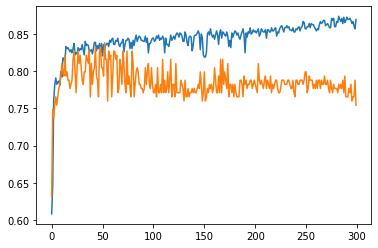

In [177]:
#plt.plot(range(len(history.history['acc'])),history.history['loss'])
plt.plot(range(len(history.history['acc'])),history.history['acc'])
#plt.show()
plt.plot(range(len(history.history['acc'])),history.history['val_acc'])
#plt.plot(range(len(history.history['acc'])),history.history['val_loss'])
plt.show()

In [116]:
NN_pred = model.predict(X_test_final)
NN_pred=NN_pred.round()
NN_pred=pd.DataFrame({'PassengerId':titanic_data_test.PassengerId, 'Survived': NN_pred[:,0]})
NN_pred.Survived=NN_pred.Survived.astype('int32')
NN_pred.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [56]:
NN_pred

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [117]:
NN_pred.to_csv('NN_predictions1.csv',index=None,header=True)

In [66]:
Y_train.to_csv( 'TrainingY.csv', index=None , header = True)